In [8]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [5]:
x,y = datasets.make_moons(noise=0.15,random_state=666)
x.shape
y.shape

(100,)

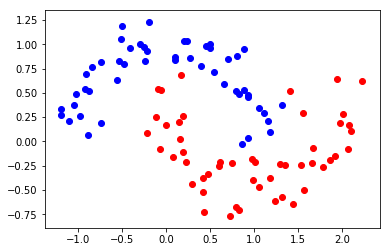

In [6]:
plt.scatter(x[y==0,0],x[y==0,1],color = "blue")
plt.scatter(x[y==1,0],x[y==1,1],color = "red")

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
def ploysvm(degree,C):
    return Pipeline([("poly",PolynomialFeatures(degree=degree)),
                     ("scale",StandardScaler()),
                     ("svm",LinearSVC(C=C))])

In [9]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

d:\python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
d:\python\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


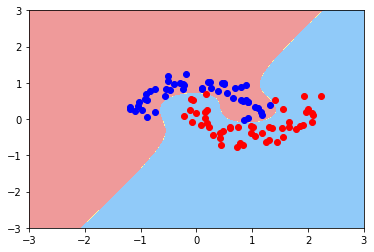

In [17]:
poly = ploysvm(degree=3,C=10)
poly.fit(x,y)
plot_decision_boundary(poly,axis=[-3,3,-3,3])
plt.scatter(x[y==0,0],x[y==0,1],color = "blue")
plt.scatter(x[y==1,0],x[y==1,1],color = "red")

In [18]:
from sklearn.svm import SVC

In [19]:
def svmkernel(degree,C):
    return Pipeline([("scale",StandardScaler()),
                     ("svc",SVC(kernel="poly",C=C,degree=degree))])

d:\python\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


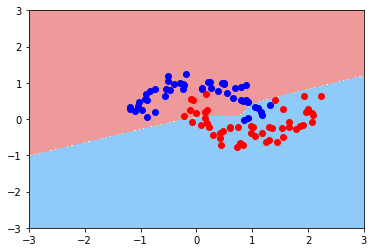

In [23]:
svmker = svmkernel(3,1e9)
svmker.fit(x,y)
plot_decision_boundary(svmker,axis=[-3,3,-3,3])
plt.scatter(x[y==0,0],x[y==0,1],color = "blue")
plt.scatter(x[y==1,0],x[y==1,1],color = "red")